## Tutorial 1 : Regression 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [5]:
lr =LinearRegression()
boston= load_boston()
lr.fit(boston.data, boston.target)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs =1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

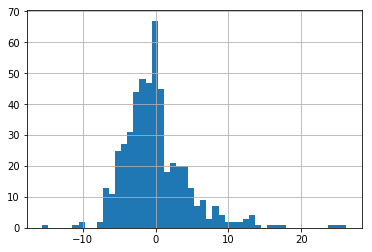

In [9]:
pred = lr.predict(boston.data)
pd.Series(boston.target - pred).hist(bins=50)

In [10]:
# Goefficient
lr.coef_

array([ -1.07170557e-01,   4.63952195e-02,   2.08602395e-02,
         2.68856140e+00,  -1.77957587e+01,   3.80475246e+00,
         7.51061703e-04,  -1.47575880e+00,   3.05655038e-01,
        -1.23293463e-02,  -9.53463555e-01,   9.39251272e-03,
        -5.25466633e-01])

The negative coefficient can be explained by the relationship between the per capita crime rate be town with the price of house in Boston. This coefficient is indicated by the first coefficient in the regression.

In [11]:
# Intercept
lr.intercept_

36.491103280363134

##  To display of all coefficients'name, type dir(lr)

In [12]:
dir(lr)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

## Fitting model with cross validation prediction

In [13]:
from sklearn.model_selection import cross_val_predict

In [15]:
preds_cv = cross_val_predict(lr, boston.data,boston.target, cv=10)

## Plot residuals of predictions vs ground true

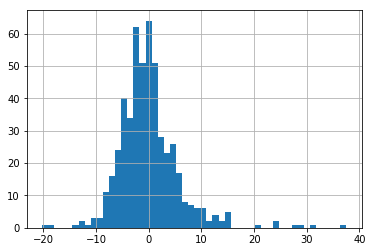

In [16]:
pd.Series(boston.target - preds_cv).hist(bins=50)

## Evaluating prediction

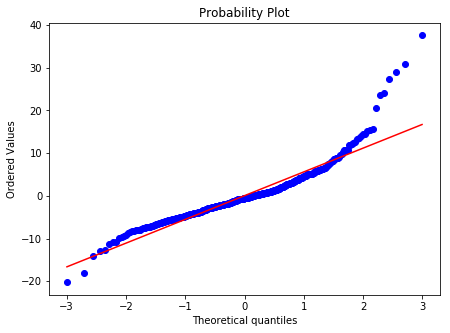

In [17]:
from scipy.stats import probplot
f = plt.figure(figsize=(7,5))
ax = f.add_subplot(111)
tuple_out = probplot(boston.target - preds_cv,plot=ax)

In [18]:
# Get access coefficient for regression line: slope, intercept, r (square root of the coefficient of determination)
tuple_out[1]

(5.5560707355667613, 0.033491319586210058, 0.93986352421028652)

In [19]:
def MSE(target,predictions):
    squared_deviation = np.power(target - predictions,2)
    return np.mean(squared_deviation)
MSE(boston.target,pred)

21.897779217687496

In [20]:
def MAD(target, predictions):
    absolute_deviation =np.abs(target - predictions)
    return np.mean(absolute_deviation)
MAD(boston.target, pred)

3.272944637996908

## Using sklearn.metric 

In [24]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

print('MSE = ',mean_squared_error(boston.target, pred))
print('MAD = ',mean_absolute_error(boston.target, pred))

MSE =  21.8977792177
MAD =  3.272944638


## Bootstrap

In [25]:
n_bootstraps =1000
len_boston =len(boston.target)
subsample_size = np.int(0.5* len_boston)

subsample = lambda: np.random.choice(np.arange(0,len_boston),size= subsample_size)

In [26]:
coefs = np.ones(n_bootstraps)
for i in range(n_bootstraps):
    subsample_idx =subsample()
    subsample_X   = boston.data[subsample_idx]
    subsample_y = boston.target[subsample_idx]
    lr.fit(subsample_X, subsample_y)
    coefs[i] = lr.coef_[0]

(array([   1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    1.,    2.,    0.,
           2.,    1.,    6.,   14.,   33.,   53.,   78.,  120.,  125.,
         110.,  111.,   86.,   68.,   38.,   34.,   26.,   23.,   19.,
          12.,   10.,    6.,    7.,    5.,    2.,    2.,    1.,    1.,
           0.,    1.,    1.,    0.,    1.]),
 array([-0.50041313, -0.4861583 , -0.47190346, -0.45764863, -0.44339379,
        -0.42913896, -0.41488413, -0.40062929, -0.38637446, -0.37211962,
        -0.35786479, -0.34360996, -0.32935512, -0.31510029, -0.30084545,
        -0.28659062, -0.27233579, -0.25808095, -0.24382612, -0.22957128,
        -0.21531645, -0.20106162, -0.18680678, -0.17255195, -0.15829712,
        -0.14404228, -0.12978745, -0.11553261, -0.10127778, -0.08702295,
        -0.07276811, -0.05851328, -0.04425844, -0.03000361, -0.01574878,
        -0.00149394,  0.01276089,  0.02701573,  0.04127056,  0.05552539,
         0.06978

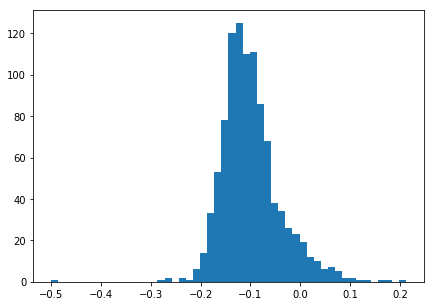

In [32]:
f =plt.figure(figsize=(7,5))
ax =f.add_subplot(111)
ax.hist(coefs, bins=50)

## Bootstrap confidence interval
Bootstrapping can potentially lead to better estimates for coefficients since bootstrapped mean with convergence to the true mean is faster than finding the coefficient using regular estimation

In [33]:
np.percentile(coefs,[2.5,97.5])

array([-0.18748927,  0.04742417])

## Ridge Regression

In [45]:
from sklearn.linear_model import Ridge
r= Ridge()
n_bootstraps =1000
len_data = len(boston.target)
subsample_size =np.int(0.5* len_data)
subsample = lambda: np.random.choice(np.arange(0, len_data),size=subsample_size)


In [55]:
coefs_r = np.ones((n_bootstraps,3))
for i in range(n_bootstraps):
    subsample_idx =subsample()
    subsample_X = boston.data[subsample_idx]
    subsample_y = boston.target[subsample_idx]
    r.fit(subsample_X,subsample_y)
    coefs_r[i][0]= r.coef_[0]
    coefs_r[i][1]= r.coef_[1]
    coefs_r[i][2]=r.coef_[2]

(array([   2.,    7.,   46.,  140.,  292.,  275.,  171.,   56.,    9.,    2.]),
 array([-0.30390289, -0.24797343, -0.19204397, -0.13611451, -0.08018505,
        -0.02425559,  0.03167387,  0.08760333,  0.14353279,  0.19946226,
         0.25539172]),
 <a list of 10 Patch objects>)

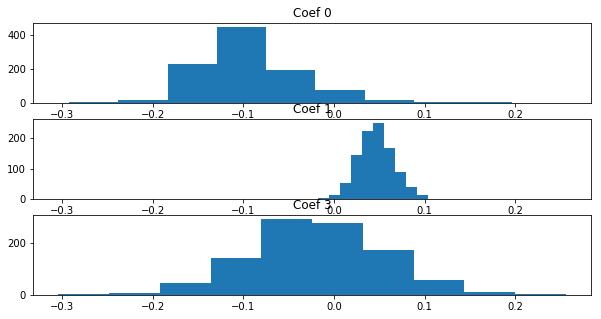

In [57]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(311,title='Coef 0')
ax1.hist(coefs_r[:,0])
ax2 = plt.subplot(312,sharex =ax1,title='Coef 1')
ax2.hist(coefs_r[:,1])
ax3 = plt.subplot(313,sharex =ax1,title='Coef 3')
ax3.hist(coefs_r[:,2])

## Check Ridge variance

In [58]:
print('Variance of Linear regression =', np.var(coefs,axis=0))

0.0035990766906830443

In [60]:
print('Variane of Ridge regression =',np.var(coefs_r,axis=0))

Variane of Ridge regression = [ 0.00335495  0.00038357  0.00526386]


## Optimazing Ridge regression
sklearn provides RidgeCV  to perform a cross-validation similar to leave-one-out-cross-validation __(LOOCV)__

In [65]:
from sklearn.linear_model import RidgeCV
r_cv = RidgeCV(alphas=[.08,.09, .1,.15,.2,.3,.4])
r_cv.fit(boston.data,boston.target)

RidgeCV(alphas=[0.08, 0.09, 0.1, 0.15, 0.2, 0.3, 0.4], cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [66]:
r_cv.alpha_

0.080000000000000002

## To store cross validation value

In [71]:
alpha_test = np.linspace(0.01,1)
r_cv = RidgeCV(alphas= alpha_test, store_cv_values=True)
r_cv.fit(boston.data,boston.target)

RidgeCV(alphas=array([ 0.01   ,  0.0302 ,  0.05041,  0.07061,  0.09082,  0.11102,
        0.13122,  0.15143,  0.17163,  0.19184,  0.21204,  0.23224,
        0.25245,  0.27265,  0.29286,  0.31306,  0.33327,  0.35347,
        0.37367,  0.39388,  0.41408,  0.43429,  0.45449,  0.47469,
        0.4949 ,  0.5151 ...3837,
        0.85857,  0.87878,  0.89898,  0.91918,  0.93939,  0.95959,
        0.9798 ,  1.     ]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=True)

In [72]:
r_cv.cv_values_.shape

(506, 50)

## Initially,  506 values in the initial regression, tested 50 different alpha values

In [74]:
smallest_idx = r_cv.cv_values_.mean(axis=0).argmin()
alpha_test[smallest_idx]

0.030204081632653063

In [75]:
# check
r_cv.alpha_

0.030204081632653063

# Using loss function
Since this is a loss function, we use sklearn to flip the sign from maximization problem to minimization problem.

In [78]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
MAD_scorer = make_scorer(mean_absolute_error,greater_is_better=True)

In [79]:
r_cv =RidgeCV(alphas = alpha_test, store_cv_values= True, scoring= MAD_scorer)
r_cv.fit(boston.data,boston.target)
smallest_idx = r_cv.cv_values_.mean(axis=0).argmin()

In [82]:
r_cv.cv_values_.mean(axis=0)[smallest_idx]

-0.021080465905580974

In [83]:
alpha_test[smallest_idx]

0.01

## Bayesian Ridge Regression

In [ ]:
from sklearn.linear_model import BayesianRidge


## Lasso
Unlike Ridge, Lasso preseves all features which allows us model polynomial . One the other hand, both Ridge and Lasso are techniques  to regularize model

In [84]:
from sklearn.linear_model import Lasso

In [85]:
lasso = Lasso()
lasso.fit(boston.data,boston.target)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

## Cross validation with Lassocv

In [86]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV()
lassocv.fit(boston.data,boston.target)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [87]:
lassocv.alpha_

0.72482042837725924

In [88]:
lassocv.coef_

array([-0.07391859,  0.04944576, -0.        ,  0.        , -0.        ,
        1.80092396,  0.01135702, -0.81333654,  0.27206588, -0.01542027,
       -0.74314538,  0.00898036, -0.70409988])

### Feature selection with LASSO

In [89]:
mask = lassocv.coef_ !=0
new_data = boston.data[:, mask]
new_data.shape

(506, 10)

## Regression LARS

In [90]:
from sklearn.linear_model import Lars
lars = Lars(n_nonzero_coefs=10)
lars.fit(boston.data, boston.target)

Lars(copy_X=True, eps=2.2204460492503131e-16, fit_intercept=True,
   fit_path=True, n_nonzero_coefs=10, normalize=True, positive=False,
   precompute='auto', verbose=False)

In [91]:
## generate artificial data
from sklearn.datasets import make_regression
reg_data, reg_target = make_regression(n_samples=200,n_features=500,n_informative=10, noise=2)

In [92]:
lars = Lars(n_nonzero_coefs=10)
lars.fit(reg_data, reg_target)

Lars(copy_X=True, eps=2.2204460492503131e-16, fit_intercept=True,
   fit_path=True, n_nonzero_coefs=10, normalize=True, positive=False,
   precompute='auto', verbose=False)

In [94]:
## check number of nonzero_ coefficients
np.sum(lars.coef_ !=0)

10

In [95]:
train_n=100
lars_12 = Lars(n_nonzero_coefs =12)
lars_12.fit(reg_data[:train_n],reg_target[:train_n])
lars_500 = Lars()
lars_500.fit(reg_data[:train_n],reg_target[:train_n])

Lars(copy_X=True, eps=2.2204460492503131e-16, fit_intercept=True,
   fit_path=True, n_nonzero_coefs=500, normalize=True, positive=False,
   precompute='auto', verbose=False)

In [96]:
np.mean(np.power(reg_target[train_n:] - lars_12.predict(reg_data[train_n:]),2))

10.629920868640772

## Transform regression into classification
We may convert regression problem into classification using threshold

In [98]:
from sklearn.preprocessing import binarize

## Let consider a regression problem 

In [99]:
import pandas as pd
url ='https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'

In [100]:
column_names = ['pregnancy_x','plasma_con','blood_pressure','skin_mm','insulin','bmi','pedigree_func','age','target']
# exclude target
feature_names = column_names[:-1]
all_data =pd.read_csv(url,names = column_names)

In [101]:
all_data.head()

,pregnancy_x,plasma_con,blood_pressure,skin_mm,insulin,bmi,pedigree_func,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [103]:
X = all_data[feature_names]
y = all_data['target']

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size =0.2, random_state=123, stratify=y)


In [105]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [106]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7857142857142857

In [111]:
## generate probabiliy prediction
y_pred_proba = lr.predict_proba(X_test)
y_pred_proba

array([[ 0.58283756,  0.41716244],
       [ 0.80447535,  0.19552465],
       [ 0.56189528,  0.43810472],
       [ 0.68523171,  0.31476829],
       [ 0.34740584,  0.65259416],
       [ 0.73342285,  0.26657715],
       [ 0.64157485,  0.35842515],
       [ 0.61733103,  0.38266897],
       [ 0.74587983,  0.25412017],
       [ 0.81752556,  0.18247444],
       [ 0.55231638,  0.44768362],
       [ 0.92990307,  0.07009693],
       [ 0.80767774,  0.19232226],
       [ 0.8981626 ,  0.1018374 ],
       [ 0.62541622,  0.37458378],
       [ 0.41464018,  0.58535982],
       [ 0.29161541,  0.70838459],
       [ 0.68828819,  0.31171181],
       [ 0.75268033,  0.24731967],
       [ 0.96658003,  0.03341997],
       [ 0.7014879 ,  0.2985121 ],
       [ 0.78439233,  0.21560767],
       [ 0.1613137 ,  0.8386863 ],
       [ 0.56636297,  0.43363703],
       [ 0.72608252,  0.27391748],
       [ 0.89711703,  0.10288297],
       [ 0.96454269,  0.03545731],
       [ 0.64748241,  0.35251759],
       [ 0.22383606,

## Using threshold to make classification 

In [112]:
from sklearn.preprocessing import binarize
y_pred_default = binarize(y_pred_proba, threshold =0.5)
y_pred_default

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,

## Support Vector Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
from sklearn import datasets
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedShuffleSplit

In [5]:
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state=7)

In [9]:
svm_est = Pipeline([('scaler',StandardScaler()),('svc',OneVsRestClassifier(SVR()))])

## Hyper-parameter search

In [17]:
c=[0.001,0.01,0.1,1]
gamma =[0.001,0.01,0.1]
params = dict(svc__estimator__gamma=gamma,svc__estimator__C=c)

In [18]:
rand_grid = RandomizedSearchCV(svm_est,param_distributions=params, cv=5,n_iter=5, scoring='neg_mean_absolute_error')
rand_grid.fit(X_train,y_train)

C:\Users\trisi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', OneVsRestClassifier(estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
          n_jobs=1))]),
          fit_params=None, iid=True, n_iter=5, n_jobs=1,
          param_distributions={'svc__estimator__gamma': [0.001, 0.01, 0.1], 'svc__estimator__C': [0.001, 0.01, 0.1, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=0)

In [19]:
rand_grid.best_params_

{'svc__estimator__C': 1, 'svc__estimator__gamma': 0.1}

In [20]:
rand_grid.best_score_

-59.855524079320112

## Linear regression using the statsmodel library

In [20]:
import numpy as np
import statsmodels.formula.api as smf

In [4]:
import pandas as pd
advert = pd.read_csv('C:/Dataset/Advertising.csv')
advert.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [9]:
model1 = smf.ols(formula='Sales~TV',data=advert).fit()
model1.params

Intercept    7.032594
TV           0.047537
dtype: float64

The equation of model is: Sales  = 7.032 + 0.047*TV

In [10]:
# p-value
model1.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [14]:
# R squared.requared
model1.rsquared

0.61187505085007099

In [15]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 14 Jan 2018   Prob (F-statistic):           1.47e-42
Time:                        11:52:01   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# prediction
sales_pred = model1.predict(pd.DataFrame(advert['TV']))
sales_pred[1:10

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
5       7.446162
6       9.765950
7      12.746498
8       7.441409
9      16.530414
10     10.174765
11     17.238710
12      8.163966
13     11.667416
14     16.734822
15     16.321253
16     10.255578
17     20.409404
18     10.322129
19     14.034741
20     17.414596
21     18.317792
22      7.660077
23     17.885209
24      9.994126
25     19.529976
26     13.825579
27     18.446141
28     18.859710
29     10.388680
         ...    
170     9.409426
171    14.852371
172     7.964312
173    15.037764
174    17.604742
175    20.195489
176    18.840695
177    15.123330
178    20.185982
179    14.904661
180    14.476831
181    17.419349
182     9.704153
183    20.704131
184    19.097393
185    16.777605
186    13.663955
187    16.116846
188    20.628073
189     7.921529
190     8.910291
191    10.621610
192     7.850224
193    14.961705
194    14.148829
195     8.848493
196    11.510545
197    15.4465

## Plotting regression

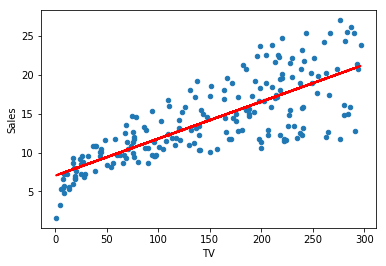

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
advert.plot(kind ='scatter',x='TV',y='Sales')
plt.plot(pd.DataFrame(advert['TV']),sales_pred,c='red',linewidth=2)

In [18]:
### compute RSE
advert['sales_pred'] = 0.047537 *advert['TV'] +7.03

In [22]:
advert['RSE'] =(advert['Sales']-advert['sales_pred'])**2
RSEd = advert.sum()['RSE']
RSE =np.sqrt(RSEd /198)
salesmean =np.mean(advert['Sales'])
error = RSE/salesmean
RSE, salesmean, error

(3.2586573692471279, 14.022500000000003, 0.23238776033140504)

## Multiple linear regression
 model is described as $$y= \alpha+ \beta_{1}X_{1}+\beta_{2}+ ...+\beta_{n}X_{n}$$
 
 There are several models such as   
 * Model 1: Sales ~ TV   
 * Model 2: Sales ~ Newspaper
 * Model 3: Sales ~ Radio
 * Model 4: Sales ~ TV + radio   
 For a model with p posibble predictor variables, there can be $2^{p}-1$ possible models.   
 Guideline: only variable with low p-values contributes to the final model such that it increases the value of $R^{2}$ (actually adjusted $R^{2}$).  
 To select variables, there are two approaches:    
 * Forward selection:
 
 * Backward selection:
 
 

# Manual adding variables

In [24]:
model2 = smf.ols(formula='Sales~TV+Newspaper',data=advert).fit()
model2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

The above result gives the model:   Sales =5.77 + 0.046 * TV +0.04 * Newspaper

In [26]:
# prediction
sales_pred =model2.predict(advert[['TV','Newspaper']])
sales_pred[1:10]

1     9.856348
2     9.646055
3    15.467318
4    16.837102
5     9.499445
6     9.510924
7    11.925419
8     6.222518
9    16.083262
dtype: float64

In [28]:
# compute RSE
advert['sales_pred']= 5.77 + 0.046* advert['TV'] +0.04* advert['Newspaper']
advert['RSE'] = (advert['Sales']-advert['sales_pred'])**2
n,p= 200,2
tmp = n-p-1
RSE = np.sqrt(advert.sum()['RSE']/197)
salesmean = np.mean(advert['Sales'])
error = RSE /salesmean
RSE, salesmean, error

(3.1346969895743846, 14.022500000000003, 0.22354765481008265)

## Multi-collinearity
This is a problem for suboptimal performance of the model when one variable correlates to other variable.   
## Variance Inflation Factor
To detect multi-collinearity, we can use Variance Inflation Factor (VIF). Let say the linear function   
$Y_{i}=a_{1}X_{1}+a_{2}X_{2}+...+a_{n}X_{n}$   
Compute the coefficient of determination $R_{i}^{2}$,    
the VIF for Yi is given by :  VIF = $\frac{1}{1-R_{i}^{2}}$   

VIF=1 : the variables are not correlated    
VIF =(1,5): moderate correlate   
VIF > 5: highly correlate    



In [29]:
model = smf.ols(formula='Newspaper~TV+Radio',data=advert).fit()
rsquared = model.rsquared
VIF =1/(1-rsquared)
VIF

1.1451873787239288

This VIF for the Newspaper

## Model validation

In [31]:
import numpy as np
a = np.random.randn(len(advert))
check =a < 0.8
training = advert[check]
testing = advert[~check]
model5 = smf.ols(formula='Sales~TV+Radio',data=training).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     622.2
Date:                Sun, 14 Jan 2018   Prob (F-statistic):           4.54e-75
Time:                        13:00:08   Log-Likelihood:                -304.09
No. Observations:                 159   AIC:                             614.2
Df Residuals:                     156   BIC:                             623.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9920      0.341      8.773      0.000       2.318       3.666
TV             0.0453      0.002     28.170      0.000       0.042       0.048
Radio          0.1877      0.009     20.946      0.000       0.170       0.205
==============================================================================
Omnibus:                       60.113   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.285
Skew:                          -1.497   Prob(JB):                     1.59e-40
Kurtosis:                       7.324   Cond. No.                         443.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Resulting model becomes, Sales~ 2.86 +0.04 * TV + 0.17 * Radio

## Summary
For a good linear model, the predictor variable should be chosen based on    
* $ R^{2} $ (adjusted $R^{2}$) the larger the better. This value should increase on adding a new predictor variable.      
* p_value: the lower the better   
* F-statistic: This value should increase after adding a new predictor. Alternative, p-value of F statistic should decrease   
* RSE: this value should decrease on addition the new predictor   
* VIF: the lower the better    


## Linear regression using scikit learn

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
feature_cols = ['TV','Radio']
X = advert[feature_cols]
Y = advert['Sales']
train_X,test_X, train_Y,test_y = train_test_split(X,Y,test_size=0.2)
lm = LinearRegression()
lm.fit(train_X,train_Y)
print('Intecept ',lm.intercept_)
print('coefficients ',lm.coef_)
print(list(zip(feature_cols,lm.coef_)))

Intecept  2.65619617942
coefficients  [ 0.0469814   0.18918948]
[('TV', 0.046981400922730822), ('Radio', 0.18918947858831978)]


In [43]:
# compute R square
lm.score(train_X,train_Y)

0.89344703370594136

## Feature selection with scilit-learn